In [26]:
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Access the environment variable
groq_api_key = os.getenv("GROQ_API_KEY")

In [27]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [28]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-70b-versatile")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [29]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

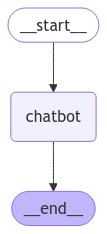

In [30]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [31]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True: 
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hello Aravinthan, nice to meet you. Is there anything I can help you with or would you like to chat?
Assistant: I don't have any information about your name. Our conversation just started, and I don't have any prior knowledge about you. If you'd like to share your name, I'd be happy to chat with you.
Goodbye!


In [7]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke("Price of Iphone 16 in INR")

'Apple iPhone 16 starts at ₹79,900 (128GB) and the 16 Plus starts at ₹89,900 (128GB). Both iPhone 16 Pro and 16 Pro Max are ₹15,000 less than the previous models starting at the price of ₹1 ... But in the US market, the iPhones are cheaper compared to other countries and the price of iPhone 16 starts at Rs 67,096 (before taxes), cost of iPhone 16 Plus is Rs 75,494 ($899). The 16 Pro Max ... Apple has announced the iPhone 16, iPhone 16 Plus, iPhone 16 Pro, and iPhone 16 Pro Max prices in India during its latest launch event. The new iPhone 16 series comes with support for the Apple Intelligence features introduced at WWDC 2024. Read on to learn more about the iPhone 16 series pricing and availability details. The iPhone 16 Pro models have received a price cut of almost Rs. 15,000. iPhone 16 Pro now starts at Rs. 1,19,900 for the 128GB model and iPhone 16 Pro Max 256GB variant costs Rs. 1,44,900. In the US, the iPhone 16 starts at $799 (roughly Rs. 67,000), while the iPhone 16 Plus costs

In [8]:
'Apple will offer all four iPhones with 128 GB, 256 GB, 512 GB storage. The second option is $100/£100/€130 more expensive than the base option, while the third is $200/£200 more. The iPhone 16 ... Apple has announced the iPhone 16, iPhone 16 Plus, iPhone 16 Pro, and iPhone 16 Pro Max prices in India during its latest launch event. The new iPhone 16 series comes with support for the Apple Intelligence features introduced at WWDC 2024. Read on to learn more about the iPhone 16 series pricing and availability details. But in the US market, the iPhones are cheaper compared to other countries and the price of iPhone 16 starts at Rs 67,096 (before taxes), cost of iPhone 16 Plus is Rs 75,494 ($899). The 16 Pro Max ... Apple iPhone 16 starts at ₹79,900 (128GB) and the 16 Plus starts at ₹89,900 (128GB). Both iPhone 16 Pro and 16 Pro Max are ₹15,000 less than the previous models starting at the price of ₹1 ... iPhone 16 price comparison: iPhone 16 and iPhone 16 Plus start at the same price as last year, ... 999 usd to inr. us dollar rate. 5099 aed to inr. 999$ in rupees. $799 in indian rupees.'


'Apple will offer all four iPhones with 128 GB, 256 GB, 512 GB storage. The second option is $100/£100/€130 more expensive than the base option, while the third is $200/£200 more. The iPhone 16 ... Apple has announced the iPhone 16, iPhone 16 Plus, iPhone 16 Pro, and iPhone 16 Pro Max prices in India during its latest launch event. The new iPhone 16 series comes with support for the Apple Intelligence features introduced at WWDC 2024. Read on to learn more about the iPhone 16 series pricing and availability details. But in the US market, the iPhones are cheaper compared to other countries and the price of iPhone 16 starts at Rs 67,096 (before taxes), cost of iPhone 16 Plus is Rs 75,494 ($899). The 16 Pro Max ... Apple iPhone 16 starts at ₹79,900 (128GB) and the 16 Plus starts at ₹89,900 (128GB). Both iPhone 16 Pro and 16 Pro Max are ₹15,000 less than the previous models starting at the price of ₹1 ... iPhone 16 price comparison: iPhone 16 and iPhone 16 Plus start at the same price as l

In [9]:
from langchain_community.tools import DuckDuckGoSearchResults

search = DuckDuckGoSearchResults()

results = search.invoke("Price of Iphone 16 in INR")

In [10]:
print(results)

snippet: Apple iPhone 16 starts at ₹79,900 (128GB) and the 16 Plus starts at ₹89,900 (128GB). Both iPhone 16 Pro and 16 Pro Max are ₹15,000 less than the previous models starting at the price of ₹1 ..., title: iPhone 16 Series Pricing in India Revealed - TechPP, link: https://techpp.com/2024/09/10/iphone-16-price-in-india/, snippet: Apple has announced the iPhone 16, iPhone 16 Plus, iPhone 16 Pro, and iPhone 16 Pro Max prices in India during its latest launch event. The new iPhone 16 series comes with support for the Apple Intelligence features introduced at WWDC 2024. Read on to learn more about the iPhone 16 series pricing and availability details., title: iPhone 16, iPhone 16 Plus, iPhone 16 Pro, iPhone 16 Pro Max Prices in ..., link: https://www.gadgets360.com/mobiles/news/iphone-16-pro-max-plus-price-india-sale-date-specifications-features-6526758, snippet: But in the US market, the iPhones are cheaper compared to other countries and the price of iPhone 16 starts at Rs 67,096 (bef

In [11]:
"""
snippet: 

Apple iPhone 16 Price in the US. The iPhone 16 is significantly cheaper in the US. Here's the breakdown: iPhone 16 (128GB): $799 (Rs 67,096) iPhone 16 Plus (128GB): $899 (Rs 75,493) As you can see, purchasing the iPhone 16 series in the US can save you nearly Rs 10,000 compared to India. This also applies to the higher storage options., title: iPhone 16 Series price in India vs USA, Dubai, Canada, Japan, France ..., 
link: https://www.indiatimes.com/technology/gadgets/iphone-16-series-16-plus-16-pro-16-pro-max-price-in-india-vs-usa-dubai-canada-japan-france-vietnam-and-global-markets-641870.html, 


snippet: 

Apple iPhone 16 starts at ₹79,900 (128GB) and the 16 Plus starts at ₹89,900 (128GB). Both iPhone 16 Pro and 16 Pro Max are ₹15,000 less than the previous models starting at the price of ₹1 ..., title: iPhone 16 Series Pricing in India Revealed - TechPP, l
ink: https://techpp.com/2024/09/10/iphone-16-price-in-india/, 

snippet: 

Apple has announced the iPhone 16, iPhone 16 Plus, iPhone 16 Pro, and iPhone 16 Pro Max prices in India during its latest launch event. The new iPhone 16 series comes with support for the Apple Intelligence features introduced at WWDC 2024. Read on to learn more about the iPhone 16 series pricing and availability details., title: iPhone 16, iPhone 16 Plus, iPhone 16 Pro, iPhone 16 Pro Max Prices in ..., link: https://www.gadgets360.com/mobiles/news/iphone-16-pro-max-plus-price-india-sale-date-specifications-features-6526758, 


snippet: But in the US market, the iPhones are cheaper compared to other countries and the price of iPhone 16 starts at Rs 67,096 (before taxes), cost of iPhone 16 Plus is Rs 75,494 ($899)., 

title: Apple iPhone 16 Series: Pricing in India, US, Canada, China, Vietnam ..., 
link: https://www.deccanchronicle.com/technology/apple-iphone-16-series-pricing-in-india-us-canada-china-vietnam-compared-1823072
"""

"\nsnippet: \n\nApple iPhone 16 Price in the US. The iPhone 16 is significantly cheaper in the US. Here's the breakdown: iPhone 16 (128GB): $799 (Rs 67,096) iPhone 16 Plus (128GB): $899 (Rs 75,493) As you can see, purchasing the iPhone 16 series in the US can save you nearly Rs 10,000 compared to India. This also applies to the higher storage options., title: iPhone 16 Series price in India vs USA, Dubai, Canada, Japan, France ..., \nlink: https://www.indiatimes.com/technology/gadgets/iphone-16-series-16-plus-16-pro-16-pro-max-price-in-india-vs-usa-dubai-canada-japan-france-vietnam-and-global-markets-641870.html, \n\n\nsnippet: \n\nApple iPhone 16 starts at ₹79,900 (128GB) and the 16 Plus starts at ₹89,900 (128GB). Both iPhone 16 Pro and 16 Pro Max are ₹15,000 less than the previous models starting at the price of ₹1 ..., title: iPhone 16 Series Pricing in India Revealed - TechPP, l\nink: https://techpp.com/2024/09/10/iphone-16-price-in-india/, \n\nsnippet: \n\nApple has announced the 

In [12]:
from typing import Annotated

from langchain_groq import ChatGroq
from langchain.tools import DuckDuckGoSearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

# Use DuckDuckGo Search Results instead of TavilySearchResults
tool = DuckDuckGoSearchResults(max_results=10)
tools = [tool]
llm = ChatGroq(model="llama-3.1-70b-versatile")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

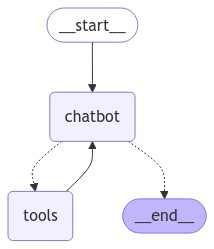

In [13]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [15]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Goodbye!


In [16]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()

python_repl.run("""
square = lambda x: x ** 2
print(square(3))
""")


Python REPL can execute arbitrary code. Use with caution.


'9\n'

In [3]:
from typing import Annotated
from langchain_groq import ChatGroq
from langchain.tools import DuckDuckGoSearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.sqlite import SqliteSaver


class State(TypedDict):
    messages: Annotated[list, add_messages]


# Build the graph
graph_builder = StateGraph(State)

# Use DuckDuckGo Search Results instead of TavilySearchResults
tool = DuckDuckGoSearchResults(max_results=10)
tools = [tool]
llm = ChatGroq(model="llama-3.1-70b-versatile")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

# Use SqliteSaver with a context manager
with SqliteSaver.from_conn_string("../logs/chat_history.db") as memory:
    # Compile the graph with SQLite memory saver
    graph = graph_builder.compile(checkpointer=memory)

    # Function to stream graph updates
    def stream_graph_updates(user_input: str, thread_id="default"):
        config = {"configurable": {"thread_id": thread_id}}
        for event in graph.stream({"messages": [("user", user_input)]}, config=config):
            for value in event.values():
                print("Assistant:", value["messages"][-1].content)

    # Chat loop to interact with the bot
    while True:
        try:
            user_input = input("User: ")
            if user_input.lower() in ["quit", "exit", "q"]:
                print("Goodbye!")
                break

            stream_graph_updates(user_input)
        except:
            # Fallback if input() is not available
            user_input = "What do you know about LangGraph?"
            print("User: " + user_input)
            stream_graph_updates(user_input)
            break


Assistant: 
Assistant: snippet: Pricing and Availability. iPhone 16 and iPhone 16 Plus will be available in ultramarine, teal, pink, white, and black in 128GB, 256GB, and 512GB storage capacities. iPhone 16 starts at $799 (U.S.) or $33.29 (U.S.) per month, and iPhone 16 Plus starts at $899 (U.S.) or $37.45 (U.S.) per month. Apple offers great ways to save and upgrade to the ..., title: Apple introduces iPhone 16 and iPhone 16 Plus - Apple, link: https://www.apple.com/newsroom/2024/09/apple-introduces-iphone-16-and-iphone-16-plus/, snippet: CUPERTINO, CALIFORNIA Apple today introduced iPhone 16 Pro and iPhone 16 Pro Max, featuring Apple Intelligence, larger display sizes, new creative capabilities with innovative pro camera features, stunning graphics for immersive gaming, and more — all powered by the A18 Pro chip.With Apple Intelligence, powerful Apple-built generative models come to iPhone in the easy-to-use personal ..., title: Apple debuts iPhone 16 Pro and iPhone 16 Pro Max - Appl

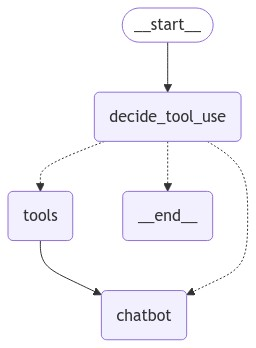

Assistant: The decision is to use the tool: False
User: What do you know about LangGraph?
Assistant: The decision is to use the tool: True
Assistant: No messages available


NameError: name 'llm_with_tools' is not defined

In [2]:
from typing import Annotated
from langchain_groq import ChatGroq
from langchain.tools import DuckDuckGoSearchResults
from langchain_core.messages import HumanMessage, AIMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.sqlite import SqliteSaver
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate

class State(TypedDict):
    messages: Annotated[list, add_messages]

# Initialize the graph builder
graph_builder = StateGraph(State)

# Use DuckDuckGo Search Results as a tool
tool = DuckDuckGoSearchResults(max_results=10)
tools = [tool]

# LLM setup for web search decision-making
decision_llm = ChatGroq(model="llama3-groq-70b-8192-tool-use-preview", temperature=0)

# Prompt for deciding whether a tool is needed
prompt = PromptTemplate(
    template="""You are a decision-making assistant. Based on the user query, decide if a web search is required. 
    If the query can be answered without additional search, return 'False'. Otherwise, return 'True'. 
    Respond in JSON format with a key 'use_tool' and the corresponding boolean value.
    Query: {query}""",
    input_variables=["query"],
)

output_parser = JsonOutputParser()

def decide_tool_use(state: State):
    user_message = state["messages"][-1].content  # Get the last user message
    prompt_input = prompt.format(query=user_message)
    
    # Invoke the model without the 'format' argument
    decision_response = decision_llm.invoke(prompt_input)
    
    # Extract the content from the AIMessage before passing it to the parser
    decision_text = decision_response.content
    
    # Parse the decision
    decision = output_parser.parse(decision_text)
    
    # Return the decision along with a new AI message
    new_message = AIMessage(content=f"The decision is to use the tool: {decision['use_tool']}")
    return {"use_tool": decision["use_tool"], "messages": [new_message]}

# Define chatbot node for handling user queries
def chatbot(state: State):
    chatbot_response = llm_with_tools.invoke(state["messages"])
    if chatbot_response:  # Ensure there is a response
        return {"messages": [chatbot_response]}
    else:
        return {"messages": [AIMessage(content="I'm sorry, I don't have an answer for that.")]}

# Add decision node to graph
graph_builder.add_node("decide_tool_use", decide_tool_use)

# Add chatbot and tool nodes
graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

# Define the routing function
def route_decision(state: State):
    if state.get("use_tool"):
        return "tools"
    return "chatbot"

# Set up conditional routing in the graph
graph_builder.add_conditional_edges("decide_tool_use", route_decision)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("decide_tool_use")

# Use SqliteSaver with a context manager
with SqliteSaver.from_conn_string("../logs/chat_history.db") as memory:
    # Compile the graph with SQLite memory saver
    graph = graph_builder.compile(checkpointer=memory)

    from IPython.display import Image, display
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception:
        pass

    # Function to stream graph updates
    def stream_graph_updates(user_input: str, thread_id="default"):
        config = {"configurable": {"thread_id": thread_id}}
        for event in graph.stream({"messages": [HumanMessage(content=user_input)]}, config=config):
            for value in event.values():
                if "messages" in value and len(value["messages"]) > 0:
                    print("Assistant:", value["messages"][-1].content)
                else:
                    print("Assistant: No messages available")

    # Chat loop to interact with the bot
    while True:
        try:
            user_input = input("User: ")
            if user_input.lower() in ["quit", "exit", "q"]:
                print("Goodbye!")
                break

            stream_graph_updates(user_input)
        except:
            # Fallback if input() is not available
            user_input = "What do you know about LangGraph?"
            print("User: " + user_input)
            stream_graph_updates(user_input)
            break


In [19]:
# LLM setup for web search decision-making
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

reflector_llm = ChatGroq(model="llama-3.1-70b-versatile", temperature=0)

prompt = ChatPromptTemplate.from_template("""
You are an AI assistant tasked with helping a salesperson negotiate and sell a product for the highest possible price. Your goal is to generate a comprehensive list of targeted, research-focused questions that the salesperson needs to explore online to gather relevant information about the product and its competitive landscape. These questions should be designed to extract data from a wide array of web sources, such as competitor websites, customer reviews, industry reports, and expert opinions, with the aim of positioning the product as a premium offering. Use advanced questioning techniques like layered inquiries, assumption-challenging questions, and open-ended probes to gather the necessary details. Ensure your questions address multiple dimensions of the product, including but not limited to its unique selling points (USPs), current pricing trends, consumer demand, market positioning, competitive advantages, features that justify a higher price point, and any perceived weaknesses or gaps in the competition. You should also generate questions that identify potential negotiation leverage, such as exploring potential scarcity of resources, understanding the financial health of the target market, evaluating regional pricing variations, and discovering customer pain points that the product can uniquely solve. The questions must drive the salesperson toward an understanding of customer behaviors, preferences, and expectations, allowing them to effectively justify a premium price. Incorporate questions that explore buyer personas, recent industry developments, and key influencers or decision-makers that could affect purchasing decisions. Additionally, ensure the questions cover legal or regulatory considerations that could impact pricing strategies. In short, list out all possible questions the salesperson should research online to build a robust, data-driven strategy for negotiating the highest possible price for their product.
    Query: {query}
    Region: {region}

    Format to follow:
    1. Question 1
    2. Question 2
    ...
    20. Question 20

    CAUTION:
    Only 20 questions are allowed.
    No need of categorizing the questions. Just list them out in a sequential order.
""")

output_parser = StrOutputParser()

chain = prompt | reflector_llm | output_parser

response = chain.invoke({"query": "Nothing Phone 2A", "region": "India"})

In [20]:
print(response)
# response = str(response)

1. What are the key features and specifications of the Nothing Phone 2A that differentiate it from its competitors in the Indian market?
2. What are the current market trends and consumer preferences in India regarding premium smartphones, and how can the Nothing Phone 2A capitalize on these trends?
3. What are the unique selling points (USPs) of the Nothing Phone 2A, and how can they be leveraged to justify a higher price point?
4. What are the pricing strategies of competitors such as Apple, Samsung, and Google in the Indian premium smartphone market, and how can the Nothing Phone 2A differentiate itself?
5. What are the customer pain points and needs that the Nothing Phone 2A can uniquely solve, and how can these be used to justify a premium price?
6. What are the recent industry developments and technological advancements in the smartphone market that the Nothing Phone 2A can leverage to position itself as a premium offering?
7. Who are the key influencers and decision-makers in th

In [21]:
## Research Router 
GROQ_LLM = ChatGroq(
    model="llama3-groq-70b-8192-tool-use-preview",
    temperature=0, stream=False,
    response_format={"type": "json_object"},
    )
prompt = PromptTemplate(
    template="""
    Convert research plan into JSON format - 
    
    "1": "<Question 1>",
    "2": "<Question 2>"
    ...
    "n": "<Question n>"
    
    Research Plan: {research_plan}
    """,
    input_variables=["research_plan"],
)

router = prompt | GROQ_LLM | JsonOutputParser()

json_response = router.invoke({"research_plan": response})

/home/rikato/Code+Notes/BargainBot/.BargainBot/lib/python3.12/site-packages/langchain_groq/chat_models.py:361: UserWarning: WARNING! stream is not default parameter.
                    stream was transferred to model_kwargs.
                    Please confirm that stream is what you intended.
  warnings.warn(
/home/rikato/Code+Notes/BargainBot/.BargainBot/lib/python3.12/site-packages/langchain_groq/chat_models.py:361: UserWarning: WARNING! response_format is not default parameter.
                    response_format was transferred to model_kwargs.
                    Please confirm that response_format is what you intended.
  warnings.warn(


In [22]:
import json

# Pretty print the JSON response
print(json.dumps(json_response, indent=4))

{
    "1": "What are the key features and specifications of the Nothing Phone 2A that differentiate it from its competitors in the Indian market?",
    "2": "What are the current market trends and consumer preferences in India regarding premium smartphones, and how can the Nothing Phone 2A capitalize on these trends?",
    "3": "What are the unique selling points (USPs) of the Nothing Phone 2A, and how can they be leveraged to justify a higher price point?",
    "4": "What are the pricing strategies of competitors such as Apple, Samsung, and Google in the Indian premium smartphone market, and how can the Nothing Phone 2A differentiate itself?",
    "5": "What are the customer pain points and needs that the Nothing Phone 2A can uniquely solve, and how can these be used to justify a premium price?",
    "6": "What are the recent industry developments and technological advancements in the smartphone market that the Nothing Phone 2A can leverage to position itself as a premium offering?",


In [23]:
# Function to search the internet for the 20 questions and collect insights
# Use DuckDuckGo Search Results instead of TavilySearchResults
from IPython.display import Markdown, display
from langchain_ollama import ChatOllama
import time

tool = DuckDuckGoSearchResults(num_results=10, region="in-en", safesearch="off")
tools = [tool]
llm = ChatOllama(model="llama-3.1", temperature=1)
llm_with_tools = llm.bind_tools(tools)

def reform_research(question, results):
    negoitator_llm = ChatGroq(model="llama-3.2-3b-preview", temperature=1)

    prompt = ChatPromptTemplate.from_template("""
    With the provided question and answer, I want the information to be in summarized and content, don't be in question and answer way. Make sure the content is accurate and to the point with no irrelevant information apart from the question. Take your time and go through chain of thoughts processing the information.
    question: {question}
    results: {results}
    """)

    output_parser = StrOutputParser()

    chain = prompt | negoitator_llm | output_parser

    response = chain.invoke({"question": question, "results": results})
    return response

def search_insights(questions: dict):
    insights = {}
    question_no = 0    
    for key, question in questions.items():
        question_no+=1
        if question_no == 3: break
        print(f"Searching for:{question_no}. {question}")
        time.sleep(10)
        results = tool.invoke(question)
        display(Markdown(reform_research(question, results)))
        # print(reform_research(question, results))
        insights[key] = results
    return insights

# Collect insights for the 20 questions
insights = search_insights(json_response)

# Print the collected insights
for key, value in insights.items():
    print(f"Question {key}: {json_response[key]}")
    print(f"Insights: {value}\n")

Searching for:1. What are the key features and specifications of the Nothing Phone 2A that differentiate it from its competitors in the Indian market?


Here's a summarized version of the content:

**Key Features and Specifications of Nothing Phone 2A:**

- **Price:** Starting at £319 (approximately $404 USD), making it a more affordable option compared to its regular counterpart.
- **Operating System:** Launched on Android 14 and Nothing OS 2.5.
- **Gaming Performance:** Bouted to be better than the Nothing Phone 1, thanks to its stronger GPU, despite a weaker CPU.
- **Design:** Maintains the signature Nothing design with a transparent back and LED lights.
- **Availability:** Available globally, except the US, where it has limited availability.
- **Developer Program:** Available, but network support is patchy.
- **Network Compatibility:** Works with T-Mobile's mid-band 5G and LTE networks.
- **Internal Performance:** Geekbench scores indicate a balance between CPU and GPU performance suitable for both gaming and everyday tasks.
- **Storage and RAM:** Offered in 8GB/128GB variation.

**Comparison to Competitors:**

- The Nothing Phone 2A is positioned to compete with mid-range devices, such as the Google Pixel 7a and iPhone SE (2022).
- Its availability and pricing are expected to shake up the mid-range market.

**Overall:**

- The Nothing Phone 2A offers a balance of performance, design, and affordability, making it a viable option for budget-conscious buyers.
- Despite its limitations in the US market, it still offers a unique blend of style and functionality at a lower price point than its premium cousin.

Searching for:2. What are the current market trends and consumer preferences in India regarding premium smartphones, and how can the Nothing Phone 2A capitalize on these trends?


**Current Market Trends and Consumer Preferences in India Regarding Premium Smartphones**

The Indian premium smartphone market is experiencing significant growth, with a 52% year-on-year growth in the premium segment. The premium segment (US$600<US$800) has seen a massive growth, with phones like the iPhone 13/14, Galaxy S23, and Realme 13 Pro+ 5G being popular choices. The ultra-premium segment (phones priced above US$ 1,000) accounted for more than one-third of total premium market sales in 2023, driving the growth of the premium segment.

**Shift in Consumer Preferences**

The market has witnessed a shift towards AI and IoT-enabled smartphones. AI and Virtual Reality (VR) are being increasingly integrated into smartphones, making them more appealing to consumers. The Internet of Things (IoT) is also making smartphone connectivity more integral to daily life.

**Increased Demand for Premium Smartphones**

India is expected to emerge as the fastest-growing premium smartphone market globally in 2023, driven primarily by the ultra-premium segment. The market is expected to continue growing, with significant purchases of premium smartphones during the first half of 2024.

**Key Trends to Capitalize on**

The following trends can be capitalized on by the Nothing Phone 2A:
1. Growing demand for premium smartphones: With a 52% year-on-year growth in the premium segment, there is a significant demand for premium smartphones in India.
2. Integration of AI and IoT: The integration of AI and IoT features in smartphones is expected to continue, making the smartphone more appealing to consumers.
3. Ultra-premium segment growth: The ultra-premium segment (phones priced above US$ 1,000) is expected to continue growing, driven by the demand for high-end smartphones.

**How to Capitalize on These Trends**

To capitalize on these trends, the Nothing Phone 2A can focus on:
1. Incorporating AI and IoT features in the smartphone to make it more appealing to consumers.
2. Targeting the ultra-premium segment with high-end features and designs.
3. Emphasizing the premium features and designs in marketing and advertising to appeal to consumers looking for a high-end smartphone experience.

By understanding and capitalizing on these trends, the Nothing Phone 2A can position itself as a premium smartphone brand in the Indian market and attract consumers looking for high-end smartphones.

Question 1: What are the key features and specifications of the Nothing Phone 2A that differentiate it from its competitors in the Indian market?
Insights: snippet: The Nothing Phone (2a) is much cheaper. As alluded to, the Nothing Phone (2a) is way cheaper than the regular Nothing Phone (2), starting at just £319. That's almost half the price of the ..., title: Nothing Phone (2a) vs Nothing Phone (2): What's the difference?, link: https://www.trustedreviews.com/versus/nothing-phone-2a-vs-nothing-phone-2-4433129, snippet: The Nothing Phone 2 launched on Android 13 and ran Nothing OS 2.0, while the newer Phone 2a and 2a Plus launched on Android 14 and ran Nothing OS 2.5 and 2.6 from the get-go, respectively., title: Nothing Phone 2 vs Nothing Phone 2a vs Nothing Phone 2a ... - TechRadar, link: https://www.techradar.com/phones/nothing-phones/nothing-phone-2-vs-nothing-phone-2a-vs-nothing-phone-2a-plus, snippet: Geekbench 6.2.2 scores help show that the Nothing Phone 2a has a weaker CPU b

In [24]:
# LLM setup for web search decision-making
negoitator_llm = ChatGroq(model="llama-3.1-70b-versatile", temperature=0)

prompt = ChatPromptTemplate.from_template("""
You are an excellent negotiator, use the below research context to your advantage and sell the product for the highest posisble price. Don't mention yourself to be a negotaition assistant. Just use the context to your advantage and negotiate the best price for the product.

Research Context: {research_context}
User Query: {user_query}
Region: {region}
""")

output_parser = StrOutputParser()

chain = prompt | negoitator_llm | output_parser

response = chain.invoke({"research_context": insights, "user_query": input(), "region": "India"})

In [42]:
"""

"""

'\n\n'

In [25]:
print(response)

Considering you're in India, I'd like to highlight some key points that might influence your decision. The Indian smartphone market has seen a significant shift towards premium devices, with the ultra-premium segment (smartphones priced at $1,000 and above) accounting for over one-third of total premium market sales in 2023.

Now, let's compare the two options:

The Nothing Phone 2a is a mid-range smartphone that offers a unique design, decent performance, and a lower price point (around ₹25,000 - ₹30,000). However, it might not be the best choice if you're looking for a premium experience.

On the other hand, the iPhone SE (2022) is a compact, premium smartphone that offers a seamless user experience, excellent camera performance, and a robust ecosystem. However, it comes with a higher price tag (around ₹50,000 - ₹60,000).

Considering the current market trends in India, I'd recommend the iPhone SE (2022) if you're willing to invest in a premium device. The iPhone SE (2022) is a more 